In [53]:
import numpy as np 
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [56]:
class bb:
    
    def __init__(self,height,width):
        self.height = height
        self.width = width
        self.bb_board = None
        self.create_bb_board()    

    def create_bb_board(self):
        # create initial state of bb board
        self.bb_board = np.zeros((self.height, self.width),dtype=int)
        
        mid_row = round(self.height/2)
        mid_row_low = mid_row-math.ceil(self.height*.1)
        mid_row_hi = mid_row+math.ceil(self.height*.1)
        
        mid_col = round(self.width/2)
        mid_col_low = mid_col-math.ceil(self.width*.1)
        mid_col_hi = mid_col+math.ceil(self.width*.1)
        
        for row in range(mid_row_low, mid_row_hi):
            for col in range(mid_col_low, mid_col_hi):
                alive_or_dead = np.random.randint(2)
                if alive_or_dead == 1:
                    self.bb_board[row][col] = 2
        
        #print(self.bb_board)
        
    def evaluate_single_step(self):

        new_board = self.bb_board.copy()

        for r, c in np.ndindex(self.bb_board.shape):
            cell = self.bb_board[r,c]
            check = self.bb_board[max(r-1, 0):min(r+2, self.height), max(c-1, 0):min(c+2, self.width)] 
            alive_neighbors = np.count_nonzero(check == 2)
            dying_neighbors = np.count_nonzero(check == 1)

            if cell == 2:
                alive_neighbors -= 1
                
            elif cell == 1:
                dying_neighbors -= 1

            if cell == 2:
                new_board[r,c] = 1

            elif cell == 1:
                new_board[r,c] = 0

            elif cell == 0 and alive_neighbors == 2:
                new_board[r,c] = 2

        self.bb_board = new_board

In [51]:
def update(i):
    label = 'timestep {0}'.format(i)    
    cell_plot.set_data(bb_instance.bb_board)
    bb_instance.evaluate_single_step()

MovieWriter imagemagick unavailable. Trying to use pillow instead.


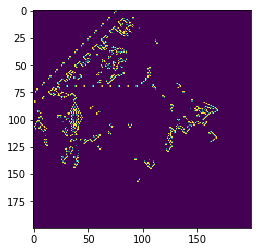

In [59]:
bb_instance = bb(200,200)

fig, ax = plt.subplots()
cell_plot = ax.imshow(bb_instance.bb_board)
anim = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=200)
anim.save('bb.gif', dpi=250, writer='imagemagick')